In [8]:
!pip install numpy matplotlib tensorflow keras scikit-learn

  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.15 requires protobuf<5,>=4.25.3, but you have protobuf 4.23.4 which is incompatible.


In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageGrab

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

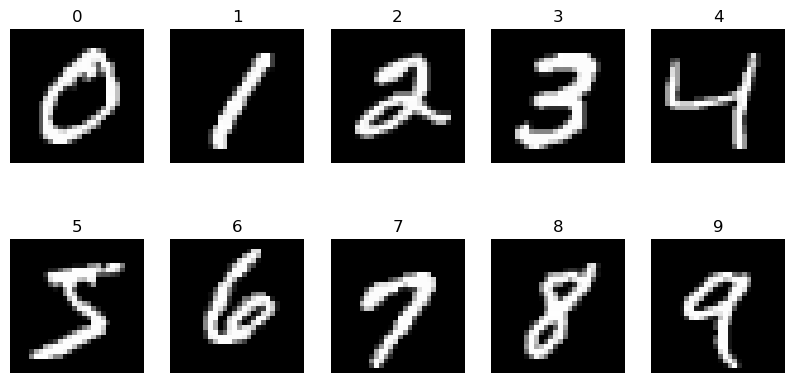

In [28]:
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
indices = [np.where(y_train == digit)[0][0] for digit in digits]

plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f'{digits[i]}')
    plt.axis('off')

In [29]:
x_train = x_train / 255.0

In [32]:
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [33]:
model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2405 - accuracy: 0.9301 - val_loss: 16.2322 - val_accuracy: 0.9656
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1014 - accuracy: 0.9686 - val_loss: 16.2502 - val_accuracy: 0.9647
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0708 - accuracy: 0.9779 - val_loss: 12.5427 - val_accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0550 - accuracy: 0.9822 - val_loss: 14.0545 - val_accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0425 - accuracy: 0.9866 - val_loss: 15.4315 - val_accuracy: 0.9770
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0361 - accuracy: 0.9879 - val_loss: 16.5437 - val_accuracy: 0.9759
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0283 - accuracy: 0.9902 - val_loss: 16.5792 - val_ac

In [51]:
img = x_train[0].reshape(1,28,28)

result = model.predict(img)


1/1 [==============================] - 0s 14ms/step


In [54]:
result.argmax()

5